# The Battle of Neighborhood — Arabic Coffee Shop in London

By: Ahmed B Darwish

abdarwish@outlook.com

# Introduction

As one of the largest English cities, London has one of the most ethnically diverse population in the world. It is considered to the world’s cultural capital with a diverse range of cultures and people. Even though English is the official Language in London, there are over 300 languages spoken in the city. According to the 2011 census, over 36.7% of the London residents or 2,998,254 people are foreign-born, which is the second largest population of immigrants in the world right behind New York. Some of the largest ethnic groups in the city include Arabs, Chinese, Bangladeshis, Pakistanis, Indians, and Africans.

My friend asked me to help him exploring London city and choose the best location for his business as he is going to open an Arabic Coffee shop in London.
He wants to provide authentic Arabic coffee to Arab and non-Arab people, so that the community knows the ancient original Arab culture, and he believes that there is no much competition in this field.

Arabic coffee is a version of the brewed coffee of Coffea arabica beans. Most Arab countries throughout the Middle East have developed distinct methods forbrewing and preparing coffee. Cardamom is an often-added spice, but it can alternatively be served plain.

It was agreed  that the location of the business should be close to the main most popular venues and neighborhoods in London, also the presence of Arab and Turkish restaurants would be an advantage.  

In this project, we will Scrap London Boroughs, Neighborhoods and Postcode data from Wikipedia, then using geopy library to convert postcodes addresses into their equivalent latitude and longitude values. 

After that, we will get the top 10 venues for each Neighborhood using Foursquare API, and using clustering K-Means algorithm to group the neighborhoods into clusters. We will also visualize the neighborhoods in London City and their emerging clusters using Folium library.

Finally, we will choose the best location for the business based on the criteria mentioned above.

<img src="Arabic_Coffee.jpg" width=300 height=600 />

# Data

This project will rely on public data from Wikipedia and Foursquare.

In [5]:
# Lets install main Libraries
import numpy as np 
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [2]:
# Scrapping london Data from wikipedia source link: (https://en.wikipedia.org/wiki/List_of_areas_of_London)
 
url = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
s = requests.Session()
response = s.get(url, timeout=10)
response
# If the request is successful, then reponse output = '200'.


<Response [200]>

In [6]:
# scrape the request response to HTML
soup = BeautifulSoup(response.content, 'html.parser')

# to view the content in html format
pretty_soup = soup.prettify()

In [7]:
# getting Wikipedia page title
soup.title.string

'List of areas of London - Wikipedia'

In [8]:
# find all the tables in the wikipedia link
all_tables=soup.find_all('table')

# get right table to scrap
right_table=soup.find('table', {"class":'wikitable sortable'})

In [9]:
# Number of columns in the table
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

6

In [10]:
# number of rows in the table including header
rows = right_table.findAll("tr")
len(rows)

533

In [11]:
# header attributes of the table
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)
print(len(header))

['Location', 'London\xa0borough', 'Post town', 'Postcode\xa0district', 'Dial\xa0code', 'OS grid ref']
6


In [12]:
# Getting the table data 
lst_data = []
for row in rows[1:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)

In [13]:
# Convert the data into pandas dataframe
df = pd.DataFrame(lst_data)
df

,0,1,2,3,4,5
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
530,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


In [14]:
# Adding Headr information to the df
df.columns = header
df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [15]:
# Renaming Column Names
df.rename(columns={"Location": "neighbourhood "})

,neighbourhood,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
530,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


In [16]:
df.rename(columns={"London borough": "borough "})
df = df.drop(['OS grid ref'], axis=1)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
530,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


In [20]:
df

,neighbourhood,London borough,Post town,Postcode district,Dial code
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020
2,Addington,Croydon[8],CROYDON,CR0,020
3,Addiscombe,Croydon[8],CROYDON,CR0,020
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020
...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020
530,Yeading,Hillingdon,HAYES,UB4,020


In [21]:
# Removing space everywhere
df.columns = df.columns.str.replace(' ', '_')
df

,neighbourhood,London borough,Post_town,Postcode district,Dial code
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020
2,Addington,Croydon[8],CROYDON,CR0,020
3,Addiscombe,Croydon[8],CROYDON,CR0,020
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020
...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020
530,Yeading,Hillingdon,HAYES,UB4,020


In [22]:
df.columns = [x.strip().replace(' ', '_') for x in df.columns]
df

,neighbourhood,London borough,Post_town,Postcode district,Dial code
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020
2,Addington,Croydon[8],CROYDON,CR0,020
3,Addiscombe,Croydon[8],CROYDON,CR0,020
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020
...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020
530,Yeading,Hillingdon,HAYES,UB4,020


In [26]:
df1

,Unnamed: 0,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code
0,0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,20
1,1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",20
2,2,Addington,Croydon[8],CROYDON,CR0,20
3,3,Addiscombe,Croydon[8],CROYDON,CR0,20
4,4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",20
...,...,...,...,...,...,...
527,527,Woolwich,Greenwich,LONDON,SE18,20
528,528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,20
529,529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,20
530,530,Yeading,Hillingdon,HAYES,UB4,20


In [27]:
# Installaing required Packages
!pip -q install geopy
!pip -q install geocoder

You should consider upgrading via the 'c:\users\abdar\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\abdar\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [28]:
#importing required libraries
import geocoder
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

In [29]:
# Geocoder Function 
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here # Thanks to Mr. Dayo John

In [40]:
df2 = df1

In [31]:
import time
start = time.time()
postal_codes = df2['Postcode_district']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]
end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  481.7160575389862 seconds


In [37]:
# Adding Lat / long information corresponding to each Post_Code
df2 = df1
df2_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df2['Latitude'] = df2_coordinates['Latitude']
df2['Longitude'] = df2_coordinates['Longitude']


In [34]:
# define an instance of the geocoder
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


In [35]:
# create map of london using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, London_borough, neighbourhood in zip(df2['Latitude'], df2['Longitude'], df2['London_borough'], df2['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, London_borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [36]:
#lets have some insights on the data
df2['London_borough'].value_counts()

Barnet                 28
Bromley                28
Havering               20
Croydon                20
Bexley                 20
                       ..
Brent, Ealing           1
Barnet[37]              1
Redbridge[9]            1
City[10]                1
Lambeth, Wandsworth     1
Name: London_borough, Length: 127, dtype: int64

In [41]:
#lets have insights on the data
df2['neighbourhood'].value_counts()

Belmont          2
Hayes            2
Plaistow         2
Church End       2
Coombe           2
                ..
Swiss Cottage    1
Barking          1
Tolworth         1
Honor Oak        1
Finsbury         1
Name: neighbourhood, Length: 526, dtype: int64

In [47]:
#x.groupby(['London_borough']).London_borough.value_counts().nlargest(5)
x2= df2['London_borough'].value_counts().nlargest(5)
x2


Barnet      28
Bromley     28
Havering    20
Croydon     20
Bexley      20
Name: London_borough, dtype: int64

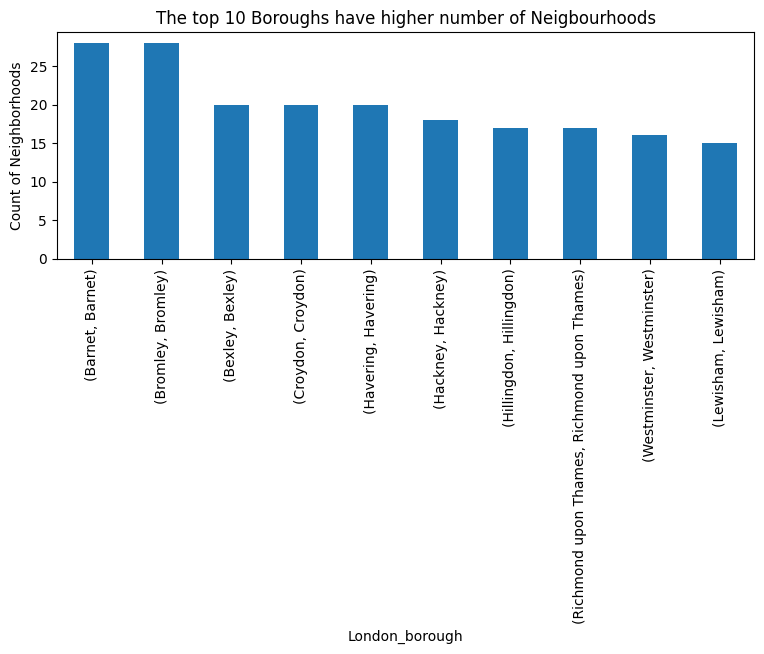

In [54]:
# Visualize top London borough's based on number of neighbourhoods 
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3), dpi = 100)
plt.title('The top 10 Boroughs have higher number of Neigbourhoods')
df2.groupby('London_borough')['London_borough'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('London_borough')
plt.ylabel('Count of Neighborhoods')
plt.show()

### From the graph above we can see that Barnet and Bromley both have Max. Number of Neighbourhoods. This will lead us to choose Barnet as a Target Bourough to Open Business.


## Now, lets Explore London Borough of Barnet

In [55]:
# Exploring London Borough of Barnet
df3 = df2[df2['London_borough']=='Barnet']
df3

,Unnamed: 0,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude
24,24,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",20,51.615680,-0.245110
60,60,Brent Cross,Barnet,LONDON,"NW2, NW4",20,51.589180,-0.228050
94,94,Childs Hill,Barnet,LONDON,NW2,20,51.562370,-0.221310
101,101,Church End,Barnet,LONDON,N3,20,51.601040,-0.194010
105,105,Colindale,Barnet,LONDON,NW9,20,51.584860,-0.248810
108,108,Colney Hatch,Barnet,LONDON,"N11, N10",20,51.591070,-0.148520
144,144,East Barnet,Barnet,BARNET,EN4,20,51.506420,-0.127210
147,147,East Finchley,Barnet,LONDON,N2,20,51.589270,-0.163950
153,153,Edgware,Barnet,EDGWARE,HA8,20,51.604980,-0.260219
170,170,Finchley,Barnet,LONDON,"N2, N3, N12",20,51.615920,-0.176740


In [57]:
df3.shape

(28, 8)

In [60]:
# Lets Clean the data nad drop un wanted coulumns
df3.drop('Unnamed: 0',
  axis='columns', inplace=True)

c:\users\abdar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df3

,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude
24,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",20,51.615680,-0.245110
60,Brent Cross,Barnet,LONDON,"NW2, NW4",20,51.589180,-0.228050
94,Childs Hill,Barnet,LONDON,NW2,20,51.562370,-0.221310
101,Church End,Barnet,LONDON,N3,20,51.601040,-0.194010
105,Colindale,Barnet,LONDON,NW9,20,51.584860,-0.248810
108,Colney Hatch,Barnet,LONDON,"N11, N10",20,51.591070,-0.148520
144,East Barnet,Barnet,BARNET,EN4,20,51.506420,-0.127210
147,East Finchley,Barnet,LONDON,N2,20,51.589270,-0.163950
153,Edgware,Barnet,EDGWARE,HA8,20,51.604980,-0.260219
170,Finchley,Barnet,LONDON,"N2, N3, N12",20,51.615920,-0.176740


In [62]:
# define an instance of the geocoder
address1 = 'London Borough of Barnet, United Kingdom'

geolocator1 = Nominatim(user_agent="London_explorer")
location1 = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geographical coordinate of London Borough of Barnet are {}, {}.'.format(latitude1, longitude1))

The geographical coordinate of London Borough of Barnet are 51.5073219, -0.1276474.


In [63]:
# create map of London Borough of Barnet, United Kingdom using latitude and longitude values
map_newyork1 = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# add markers to map
for lat, lng, London_borough, neighbourhood in zip(df3['Latitude'], df3['Longitude'], df3['London_borough'], df3['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, London_borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork1)  
    
map_newyork1

## Now, we will explore all Neighborhoods in Barnet using Foursquare API

In [167]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value



In [65]:
#Let's create a function to repeat the same process to all the neighborhoods in Manhattan
# Let's create a function to repeat the same process to all the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
# run the above function on each neighborhood and create a new dataframe called Barnet_venues
# type your answer here
Barnet_venues = getNearbyVenues(names=df3['neighbourhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

Barnet Gate
Brent Cross
Childs Hill
Church End
Colindale
Colney Hatch
East Barnet
East Finchley
Edgware
Finchley
Friern Barnet
Golders Green
Grahame Park
The Hale
Hampstead Garden Suburb
Hendon
The Hyde
Mill Hill
Monken Hadley
New Barnet
New Southgate
North Finchley
Oakleigh Park
Osidge
Totteridge
West Hendon
Whetstone
Woodside Park


### Let's check the size of the resulting dataframe

In [67]:
# Let's check the size of the resulting dataframe
print(Barnet_venues.shape)
Barnet_venues.head()

(666, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnet Gate,51.61568,-0.24511,The Good Earth,51.616961,-0.245282,Chinese Restaurant
1,Barnet Gate,51.61568,-0.24511,Bluebelles of Portabello,51.614848,-0.246753,Café
2,Barnet Gate,51.61568,-0.24511,Day of the Raj,51.616012,-0.244872,Indian Restaurant
3,Barnet Gate,51.61568,-0.24511,PizzaExpress,51.615861,-0.244703,Pizza Place
4,Barnet Gate,51.61568,-0.24511,M&S Foodhall,51.614187,-0.249267,Grocery Store


In [68]:
# Let's check how many venues were returned for each neighborhood
Barnet_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barnet Gate,20,20,20,20,20,20
Brent Cross,16,16,16,16,16,16
Childs Hill,6,6,6,6,6,6
Church End,35,35,35,35,35,35
Colindale,16,16,16,16,16,16
Colney Hatch,45,45,45,45,45,45
East Barnet,88,88,88,88,88,88
East Finchley,33,33,33,33,33,33
Edgware,3,3,3,3,3,3


In [75]:
# Lets Visualize Top 10 Neighborhoods based on Count of Venues 
#y = Barnet_venues.groupby('Neighborhood').count()
y= Barnet_venues

In [76]:
y.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [77]:
y

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnet Gate,51.61568,-0.24511,The Good Earth,51.616961,-0.245282,Chinese Restaurant
1,Barnet Gate,51.61568,-0.24511,Bluebelles of Portabello,51.614848,-0.246753,Café
2,Barnet Gate,51.61568,-0.24511,Day of the Raj,51.616012,-0.244872,Indian Restaurant
3,Barnet Gate,51.61568,-0.24511,PizzaExpress,51.615861,-0.244703,Pizza Place
4,Barnet Gate,51.61568,-0.24511,M&S Foodhall,51.614187,-0.249267,Grocery Store
...,...,...,...,...,...,...,...
661,Woodside Park,51.61592,-0.17674,Khoai Cafe,51.613467,-0.177361,Vietnamese Restaurant
662,Woodside Park,51.61592,-0.17674,Bus Stop E,51.613343,-0.175889,Bus Stop
663,Woodside Park,51.61592,-0.17674,Coffee Seeker,51.611947,-0.178683,Café
664,Woodside Park,51.61592,-0.17674,Il Tocca d'Artista,51.612078,-0.178413,Italian Restaurant


In [78]:
y = y.groupby('Neighborhood').count()

In [79]:
y

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barnet Gate,20,20,20,20,20,20
Brent Cross,16,16,16,16,16,16
Childs Hill,6,6,6,6,6,6
Church End,35,35,35,35,35,35
Colindale,16,16,16,16,16,16
Colney Hatch,45,45,45,45,45,45
East Barnet,88,88,88,88,88,88
East Finchley,33,33,33,33,33,33
Edgware,3,3,3,3,3,3


In [80]:
y= y["Venue"]

In [95]:
z= Barnet_venues
z= z[["Neighborhood","Venue"]]
z

,Neighborhood,Venue
0,Barnet Gate,The Good Earth
1,Barnet Gate,Bluebelles of Portabello
2,Barnet Gate,Day of the Raj
3,Barnet Gate,PizzaExpress
4,Barnet Gate,M&S Foodhall
...,...,...
661,Woodside Park,Khoai Cafe
662,Woodside Park,Bus Stop E
663,Woodside Park,Coffee Seeker
664,Woodside Park,Il Tocca d'Artista


In [96]:
z= z.groupby('Neighborhood').count()
z

,Venue
Neighborhood,
Barnet Gate,20
Brent Cross,16
Childs Hill,6
Church End,35
Colindale,16
Colney Hatch,45
East Barnet,88
East Finchley,33
Edgware,3


In [101]:
z.columns

Index(['Venue'], dtype='object')

In [114]:
#top 10 Neighbourhoods having higher number of venues
z2= z.nlargest(10, 'Venue')

In [115]:
z2

,Venue
Neighborhood,
East Barnet,88
Colney Hatch,45
Finchley,39
North Finchley,39
Woodside Park,39
Church End,35
East Finchley,33
Hampstead Garden Suburb,33
Golders Green,26


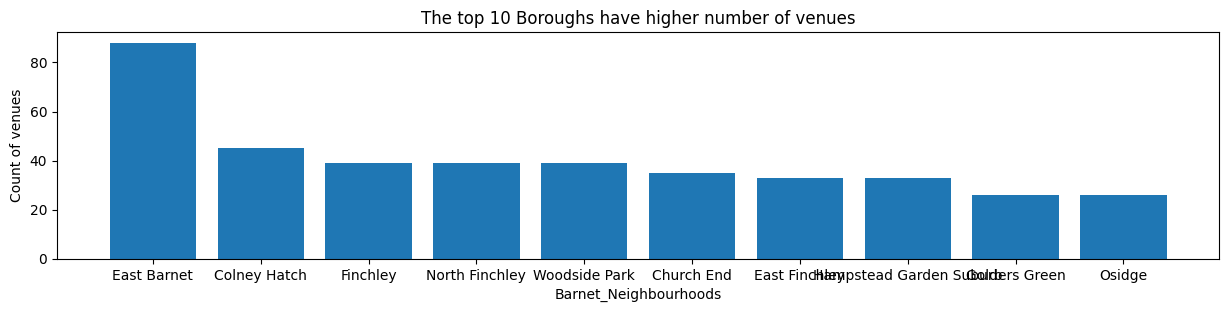

In [125]:
# Visualize top 10 Barent_Neighbourhoods based on count of venues 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3), dpi = 100)
plt.title('The top 10 Neighbourhoods have higher number of venues')
#z.groupby('Neighborhood')['Venue'].value_counts().nlargest(10).plot(kind='bar')
#plt.plot(z.index.values, z['Venue'], kind = 'bar')
plt.bar(z2.index.values, z2['Venue'])
plt.xlabel('Barnet_Neighbourhoods')
plt.ylabel('Count of venues')
plt.show()
#plt.plot(site2.index.values, site2['Cl'])
#plt.show()
#ax.bar(langs,students)

Let's find out how many unique categories can be curated from all the returned venues

In [118]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Barnet_venues['Venue Category'].unique())))

There are 111 uniques categories.


## 3. Analyze Each Neighborhood

In [119]:
# one hot encoding
Barnet_onehot = pd.get_dummies(Barnet_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Barnet_onehot['Neighborhood'] = Barnet_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Barnet_onehot.columns[-1]] + list(Barnet_onehot.columns[:-1])
Barnet_onehot = Barnet_onehot[fixed_columns]

Barnet_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,...,Tea Room,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Train Station,Turkish Restaurant,Vietnamese Restaurant,Water Park,Wine Bar
0,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# And let's examine the new dataframe size
Barnet_onehot.shape

(666, 112)

In [121]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Barnet_grouped = Barnet_onehot.groupby('Neighborhood').mean().reset_index()
Barnet_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,...,Tea Room,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Train Station,Turkish Restaurant,Vietnamese Restaurant,Water Park,Wine Bar
0,Barnet Gate,0.000000,0.05,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.05,0.000000
1,Brent Cross,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0625,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00,0.000000
2,Childs Hill,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Church End,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.085714,0.028571,0.00,0.000000
4,Colindale,0.000000,0.00,0.000000,0.000000,0.125000,0.0625,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,Colney Hatch,0.022222,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.044444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,East Barnet,0.000000,0.00,0.034091,0.022727,0.000000,0.0000,0.000000,0.0000,0.011364,...,0.011364,0.011364,0.068182,0.011364,0.000000,0.000000,0.000000,0.000000,0.00,0.022727
7,East Finchley,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.00,0.000000
8,Edgware,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Finchley,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.025641,...,0.025641,0.025641,0.025641,0.000000,0.000000,0.000000,0.025641,0.025641,0.00,0.000000


In [122]:
# Let's confirm the new size
Barnet_grouped.shape

(28, 112)

In [123]:
# Let's print each neighborhood along with the top 5 most common venues
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Barnet_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Barnet_grouped[Barnet_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barnet Gate----
              venue  freq
0         Juice Bar  0.10
1          Platform  0.10
2     Grocery Store  0.10
3  Stationery Store  0.05
4          Pharmacy  0.05


----Brent Cross----
                  venue  freq
0           Coffee Shop  0.12
1                   Pub  0.06
2      Sushi Restaurant  0.06
3             Irish Pub  0.06
4  Gym / Fitness Center  0.06


----Childs Hill----
                  venue  freq
0           Bus Station  0.17
1  Gym / Fitness Center  0.17
2           Music Venue  0.17
3           Supermarket  0.17
4         Historic Site  0.17


----Church End----
                venue  freq
0         Supermarket  0.09
1  Turkish Restaurant  0.09
2         Pizza Place  0.06
3      Cosmetics Shop  0.06
4         Coffee Shop  0.06


----Colindale----
              venue  freq
0          Bus Stop  0.12
1  Asian Restaurant  0.12
2    Ice Cream Shop  0.06
3       Coffee Shop  0.06
4              Café  0.06


----Colney Hatch----
                 venue  freq
0  

In [124]:
# Let's put that into a pandas dataframe
# let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [126]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Barnet_grouped['Neighborhood']

for ind in np.arange(Barnet_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barnet_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet Gate,Grocery Store,Platform,Juice Bar,Pizza Place,Italian Restaurant,Restaurant,Bus Stop,Pub,Stationery Store,Chinese Restaurant
1,Brent Cross,Coffee Shop,Pizza Place,Japanese Restaurant,Noodle House,Pub,Chinese Restaurant,Fried Chicken Joint,Student Center,Sushi Restaurant,Park
2,Childs Hill,Music Venue,Historic Site,Gym / Fitness Center,Clothing Store,Supermarket,Bus Station,Wine Bar,Diner,Discount Store,English Restaurant
3,Church End,Supermarket,Turkish Restaurant,Cosmetics Shop,Pizza Place,Pub,Japanese Restaurant,Café,Coffee Shop,Playground,Chinese Restaurant
4,Colindale,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant


In [127]:
Barnet_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,...,Tea Room,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Train Station,Turkish Restaurant,Vietnamese Restaurant,Water Park,Wine Bar
0,Barnet Gate,0.000000,0.05,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.05,0.000000
1,Brent Cross,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0625,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00,0.000000
2,Childs Hill,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Church End,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.085714,0.028571,0.00,0.000000
4,Colindale,0.000000,0.00,0.000000,0.000000,0.125000,0.0625,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,Colney Hatch,0.022222,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.044444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,East Barnet,0.000000,0.00,0.034091,0.022727,0.000000,0.0000,0.000000,0.0000,0.011364,...,0.011364,0.011364,0.068182,0.011364,0.000000,0.000000,0.000000,0.000000,0.00,0.022727
7,East Finchley,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.00,0.000000
8,Edgware,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Finchley,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.025641,...,0.025641,0.025641,0.025641,0.000000,0.000000,0.000000,0.025641,0.025641,0.00,0.000000


## 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters

In [128]:
# set number of clusters
kclusters = 5

Barnet_grouped_clustering = Barnet_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Barnet_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([2, 2, 1, 2, 1, 2, 2, 2, 3, 2])

In [129]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet Gate,Grocery Store,Platform,Juice Bar,Pizza Place,Italian Restaurant,Restaurant,Bus Stop,Pub,Stationery Store,Chinese Restaurant
1,Brent Cross,Coffee Shop,Pizza Place,Japanese Restaurant,Noodle House,Pub,Chinese Restaurant,Fried Chicken Joint,Student Center,Sushi Restaurant,Park
2,Childs Hill,Music Venue,Historic Site,Gym / Fitness Center,Clothing Store,Supermarket,Bus Station,Wine Bar,Diner,Discount Store,English Restaurant
3,Church End,Supermarket,Turkish Restaurant,Cosmetics Shop,Pizza Place,Pub,Japanese Restaurant,Café,Coffee Shop,Playground,Chinese Restaurant
4,Colindale,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant
5,Colney Hatch,Café,Coffee Shop,Pizza Place,Pub,Bakery,Grocery Store,Deli / Bodega,English Restaurant,Japanese Restaurant,Mediterranean Restaurant
6,East Barnet,Hotel,Theater,Monument / Landmark,Plaza,Pub,Garden,Art Gallery,Steakhouse,Wine Bar,Spa
7,East Finchley,Coffee Shop,Café,Pub,Bus Stop,Platform,Grocery Store,Sandwich Place,Farmers Market,Record Shop,Playground
8,Edgware,Gym,Bakery,Metro Station,Wine Bar,Fried Chicken Joint,Diner,Discount Store,English Restaurant,Falafel Restaurant,Farmers Market
9,Finchley,Coffee Shop,Café,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Sushi Restaurant,Portuguese Restaurant,Japanese Restaurant,Breakfast Spot


In [132]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Barnet_merged = df3

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Barnet_merged = Barnet_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighbourhood')

Barnet_merged.head() # check the last columns!

,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",20,51.61568,-0.24511,2,Grocery Store,Platform,Juice Bar,Pizza Place,Italian Restaurant,Restaurant,Bus Stop,Pub,Stationery Store,Chinese Restaurant
60,Brent Cross,Barnet,LONDON,"NW2, NW4",20,51.58918,-0.22805,2,Coffee Shop,Pizza Place,Japanese Restaurant,Noodle House,Pub,Chinese Restaurant,Fried Chicken Joint,Student Center,Sushi Restaurant,Park
94,Childs Hill,Barnet,LONDON,NW2,20,51.56237,-0.22131,1,Music Venue,Historic Site,Gym / Fitness Center,Clothing Store,Supermarket,Bus Station,Wine Bar,Diner,Discount Store,English Restaurant
101,Church End,Barnet,LONDON,N3,20,51.60104,-0.19401,2,Supermarket,Turkish Restaurant,Cosmetics Shop,Pizza Place,Pub,Japanese Restaurant,Café,Coffee Shop,Playground,Chinese Restaurant
105,Colindale,Barnet,LONDON,NW9,20,51.58486,-0.24881,1,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant


In [133]:
# Finally let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Barnet_merged['Latitude'], Barnet_merged['Longitude'], Barnet_merged['neighbourhood'], Barnet_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [134]:
# Save the work into CSV
Barnet_merged.to_csv(r'df_Clustered.CSV')

In [135]:
#lets have insights on the data, How many Points per cluster
Barnet_merged['Cluster Labels'].value_counts()

2    18
1     5
4     2
0     2
3     1
Name: Cluster Labels, dtype: int64

In [148]:
# Cluster 1
Barnet_merged.loc[Barnet_merged['Cluster Labels'] == 0, Barnet_merged.columns[[1] + list(range(5, Barnet_merged.shape[1]))]]

,London_borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
311,Barnet,51.644415,-0.179183,0,Coffee Shop,Pub,Recruiting Agency,Café,Wine Bar,Dance Studio,Dessert Shop,Diner,Discount Store,English Restaurant
321,Barnet,51.644415,-0.179183,0,Coffee Shop,Pub,Recruiting Agency,Café,Wine Bar,Dance Studio,Dessert Shop,Diner,Discount Store,English Restaurant


In [149]:
# Cluster 2
Barnet_merged.loc[Barnet_merged['Cluster Labels'] == 1, Barnet_merged.columns[[1] + list(range(5, Barnet_merged.shape[1]))]]

,London_borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Barnet,51.56237,-0.22131,1,Music Venue,Historic Site,Gym / Fitness Center,Clothing Store,Supermarket,Bus Station,Wine Bar,Diner,Discount Store,English Restaurant
105,Barnet,51.58486,-0.24881,1,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant
192,Barnet,51.58486,-0.24881,1,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant
252,Barnet,51.58486,-0.24881,1,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant
507,Barnet,51.58486,-0.24881,1,Asian Restaurant,Bus Stop,Ice Cream Shop,Bar,Hotel,Coffee Shop,Pub,Café,Supermarket,Sushi Restaurant


In [150]:
# Cluster 3
Barnet_merged.loc[Barnet_merged['Cluster Labels'] == 2, Barnet_merged.columns[[1] + list(range(5, Barnet_merged.shape[1]))]]

,London_borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Barnet,51.61568,-0.24511,2,Grocery Store,Platform,Juice Bar,Pizza Place,Italian Restaurant,Restaurant,Bus Stop,Pub,Stationery Store,Chinese Restaurant
60,Barnet,51.58918,-0.22805,2,Coffee Shop,Pizza Place,Japanese Restaurant,Noodle House,Pub,Chinese Restaurant,Fried Chicken Joint,Student Center,Sushi Restaurant,Park
101,Barnet,51.60104,-0.19401,2,Supermarket,Turkish Restaurant,Cosmetics Shop,Pizza Place,Pub,Japanese Restaurant,Café,Coffee Shop,Playground,Chinese Restaurant
108,Barnet,51.59107,-0.14852,2,Café,Coffee Shop,Pizza Place,Pub,Bakery,Grocery Store,Deli / Bodega,English Restaurant,Japanese Restaurant,Mediterranean Restaurant
144,Barnet,51.50642,-0.12721,2,Hotel,Theater,Monument / Landmark,Plaza,Pub,Garden,Art Gallery,Steakhouse,Wine Bar,Spa
147,Barnet,51.58927,-0.16395,2,Coffee Shop,Café,Pub,Bus Stop,Platform,Grocery Store,Sandwich Place,Farmers Market,Record Shop,Playground
170,Barnet,51.61592,-0.17674,2,Coffee Shop,Café,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Sushi Restaurant,Portuguese Restaurant,Japanese Restaurant,Breakfast Spot
189,Barnet,51.57673,-0.19695,2,Bakery,Café,Grocery Store,Turkish Restaurant,Korean Restaurant,Italian Restaurant,Restaurant,Sandwich Place,Middle Eastern Restaurant,Fast Food Restaurant
206,Barnet,51.61568,-0.24511,2,Grocery Store,Platform,Juice Bar,Pizza Place,Italian Restaurant,Restaurant,Bus Stop,Pub,Stationery Store,Chinese Restaurant
210,Barnet,51.58927,-0.16395,2,Coffee Shop,Café,Pub,Bus Stop,Platform,Grocery Store,Sandwich Place,Farmers Market,Record Shop,Playground


Cluster 3, rich in multicultural cuisine restaurants

In [152]:
# Cluster 4
Barnet_merged.loc[Barnet_merged['Cluster Labels'] == 3, Barnet_merged.columns[[1] + list(range(5, Barnet_merged.shape[1]))]]

,London_borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
153,Barnet,51.60498,-0.260219,3,Gym,Bakery,Metro Station,Wine Bar,Fried Chicken Joint,Diner,Discount Store,English Restaurant,Falafel Restaurant,Farmers Market


In [153]:
# Cluster 5
Barnet_merged.loc[Barnet_merged['Cluster Labels'] == 4, Barnet_merged.columns[[1] + list(range(5, Barnet_merged.shape[1]))]]

,London_borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
180,Barnet,51.61631,-0.13839,4,Grocery Store,Pub,Fish & Chips Shop,Beer Bar,Breakfast Spot,Train Station,Turkish Restaurant,Diner,Discount Store,English Restaurant
325,Barnet,51.61631,-0.13839,4,Grocery Store,Pub,Fish & Chips Shop,Beer Bar,Breakfast Spot,Train Station,Turkish Restaurant,Diner,Discount Store,English Restaurant


Note: Cluster 3, rich in multicultural cuisine restaurants
 

So because the business is about Arabic Coffee Shop, its important to be close to Middle east resturants ..  

In [143]:

Barnet_merged.apply(lambda row: row.astype(str).str.contains('Middle').any(), axis=1)



24     False
60     False
94     False
101    False
105    False
108    False
144    False
147    False
153    False
170    False
180    False
189     True
192    False
206    False
210    False
233    False
252    False
307    False
311    False
321    False
325    False
334    False
346    False
352     True
467    False
507    False
513    False
526    False
dtype: bool

In [144]:
# Function To Search for a specific Keywords in entire dataset - pandas
def search(regex: str, df, case=False):
    """Search all the text columns of `df`, return rows with any matches."""
    textlikes = df.select_dtypes(include=[object, "string"])
    return df[
        textlikes.apply(
            lambda column: column.str.contains(regex, regex=True, case=case, na=False)
        ).any(axis=1)
    ]

In [145]:
# Searching for neighbourhoods that has Middle Eastern Restaurant 
search ('Middle', Barnet_merged, case=False )

,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
189,Golders Green,Barnet,LONDON,NW11,20,51.57673,-0.19695,2,Bakery,Café,Grocery Store,Turkish Restaurant,Korean Restaurant,Italian Restaurant,Restaurant,Sandwich Place,Middle Eastern Restaurant,Fast Food Restaurant
352,Osidge,Barnet,LONDON,N14,20,51.63429,-0.13366,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Café,Gym / Fitness Center,Turkish Restaurant,Italian Restaurant,Pharmacy,Middle Eastern Restaurant,Portuguese Restaurant


### Now, we get to know best locations to open Arabic Coffee Business. Its recommended to Open the Business nearby Golders Green neighbourhood because its in top 10 neighbourhoods in Barnet in terms of number of venues

In [146]:
# Lets Visualize the Target locations
Business_Loc = search ('Middle', Barnet_merged, case=False )
Business_Loc

,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
189,Golders Green,Barnet,LONDON,NW11,20,51.57673,-0.19695,2,Bakery,Café,Grocery Store,Turkish Restaurant,Korean Restaurant,Italian Restaurant,Restaurant,Sandwich Place,Middle Eastern Restaurant,Fast Food Restaurant
352,Osidge,Barnet,LONDON,N14,20,51.63429,-0.13366,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Café,Gym / Fitness Center,Turkish Restaurant,Italian Restaurant,Pharmacy,Middle Eastern Restaurant,Portuguese Restaurant


In [154]:
# Lets Drop Osidge from the dataframe 
Business_Loc = Business_Loc.drop([352], axis=0)
Business_Loc

,neighbourhood,London_borough,Post_town,Postcode_district,Dial_code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
189,Golders Green,Barnet,LONDON,NW11,20,51.57673,-0.19695,2,Bakery,Café,Grocery Store,Turkish Restaurant,Korean Restaurant,Italian Restaurant,Restaurant,Sandwich Place,Middle Eastern Restaurant,Fast Food Restaurant


In [162]:
# Finally let's visualize the resulting clusters
# create map
Target_Location = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Business_Loc['Latitude'], Business_Loc['Longitude'], Business_Loc['neighbourhood'], Business_Loc['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=12,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Target_Location)
       
Target_Location

## Result and Findings

1. Barnet and Bromley Bouroughs both have 28 Neighborhoods in the top compared to other Boroughs in London, for simplicity we choosed London Borough of Barnet to Explore.
2. East Barnet Neighborhood has the Max. Number of Venues (88 venues) based on Foursquare data
3. Top 10 Neighborhoods in Barnet based on Number of venues are: East Barnet, Colney Hatch , Finchley, North Finchley, Woodside Park, Church End, East Finchley, Hampstead Garden Suburb, Golders Green, Osidge
4. Its important to Open Arabic Coffee Shop business near to Middle Eastern Resturants.
5. Only Golders Green and Osidge neighbourhoods have Middle Eastern Resturants in their Most Common Venues.
6. The Best Location for the business recommended to be nearby Golders Green neighbourhood because its in the top 10 neighbourhoods in Barnet in terms of number of venues.